# Portfolio Performance & Risk Analysis (Part II)

## Table of Contents
<hr style="border: 0.25px solid black;">

- [4. Capital Asset Pricing Model](#section-4)
    * [4.1 Market Portfolio and Annualized Covariance](#subsection-41)
    * [4.2 Beta, Systematic Risk, and Idiosyncratic Risk](#subsection-42)
    * [4.3 Rolling Beta](#subsection-43)
    * [4.4 Expected Return and Alpha](#subsection-44)
    * [4.5 Security Market Line](#subsection-45)
$$$$
- [5. Farma-French 5-Factor Model](#section-5)
    * [5.1 Risk Factor Data (Daily)](#subsection-51)
    * [5.2 Linear Regression](#subsection-52)
    * [5.3 Regression Coefficients : Magnitude of Risk Factors Driving Returns](#subsection-53)
    * [5.4 Model Evaluation](#subsection-54)
    * [5.5 Residual Analysis](#subsection-55)

## 4. Capital Asset Pricing Model 
<a id="section-4"></a>
<hr style="border: 0.25px solid black;">

### 4.1 Market Portfolio and Annualized Covariance
<a id="subsection-41"></a>

$$
\text{Annualized Cov}(\text{Return}_X, \text{Return}_Y) = \left( \frac{1}{T-1} \sum_{t=1}^{T} (\text{Return}_{X,t} - \bar{\text{Return}}_{X}) \times (\text{Return}_{Y,t} - \bar{\text{Return}}_{Y}) \right) \times 252 
$$

In [181]:
sp500 = yf.download(tickers = "^GSPC", start = start_date, end = end_date)
returns["MP"] = sp500["Close"].pct_change(periods = 1).dropna( ) 
cov_table = returns.cov( ) * 252 

summary_MP = risk_return(returns["MP"].to_frame( ))
summary = pd.concat(objs = [summary, summary_MP], axis = 0) 

[*********************100%%**********************]  1 of 1 completed


In [182]:
ann_summary = summary["Annual"].copy( )
ann_summary.columns = ["Annual Return", "Annual Volatility", "Annual Sharpe"]

In [183]:
cov_table

AAPL    AMD   AMZN   AVGO  GOOGL   INTC   META   MSFT   NFLX   NVDA  \
AAPL  0.1127 0.1093 0.0790 0.0850 0.0778 0.0781 0.0954 0.0851 0.0778 0.1217   
AMD   0.1093 0.2877 0.1180 0.1293 0.1069 0.1154 0.1299 0.1118 0.1186 0.2280   
AMZN  0.0790 0.1180 0.1421 0.0765 0.0840 0.0702 0.1081 0.0836 0.1019 0.1242   
AVGO  0.0850 0.1293 0.0765 0.1470 0.0784 0.0976 0.0936 0.0850 0.0793 0.1459   
GOOGL 0.0778 0.1069 0.0840 0.0784 0.1124 0.0755 0.1070 0.0845 0.0763 0.1184   
INTC  0.0781 0.1154 0.0702 0.0976 0.0755 0.1702 0.0912 0.0799 0.0764 0.1204   
META  0.0954 0.1299 0.1081 0.0936 0.1070 0.0912 0.2187 0.0958 0.1169 0.1434   
MSFT  0.0851 0.1118 0.0836 0.0850 0.0845 0.0799 0.0958 0.1064 0.0779 0.1282   
NFLX  0.0778 0.1186 0.1019 0.0793 0.0763 0.0764 0.1169 0.0779 0.2369 0.1280   
NVDA  0.1217 0.2280 0.1242 0.1459 0.1184 0.1204 0.1434 0.1282 0.1280 0.2938   
QCOM  0.0933 0.1464 0.0862 0.1180 0.0860 0.1064 0.1025 0.0885 0.0867 0.1547   
TSLA  0.1169 0.1738 0.1166 0.1266 0.0978 0.0985 0.1164 0.1048 0.1282 0.1931   
PWP   0.0909 0.1387 0.0962 0.1066 0.0874 0.0905 0.1159 0.0913 0.1174 0.1534   
EWP   0.0943 0.1479 0.0992 0.1052 0.0921 0.0983 0.1182 0.0943 0.1087 0.1583   
MVWP  0.0951 0.1263 0.0972 0.0918 0.0878 0.0846 0.1098 0.0933 0.0936 0.1412   
IVP   0.0903 0.1370 0.0954 0.1002 0.0894 0.0944 0.1138 0.0911 0.1030 0.1483   
MVP   0.0873 0.1226 0.0945 0.0967 0.0854 0.0928 0.1053 0.0879 0.1048 0.1344   
MSP   0.1070 0.1747 0.1042 0.1232 0.0967 0.1016 0.1186 0.1048 0.1137 0.1981   
MP    0.0630 0.0802 0.0554 0.0688 0.0596 0.0637 0.0683 0.0622 0.0537 0.0894   

        QCOM   TSLA    PWP    EWP   MVWP    IVP    MVP    MSP     MP  
AAPL  0.0933 0.1169 0.0909 0.0943 0.0951 0.0903 0.0873 0.1070 0.0630  
AMD   0.1464 0.1738 0.1387 0.1479 0.1263 0.1370 0.1226 0.1747 0.0802  
AMZN  0.0862 0.1166 0.0962 0.0992 0.0972 0.0954 0.0945 0.1042 0.0554  
AVGO  0.1180 0.1266 0.1066 0.1052 0.0918 0.1002 0.0967 0.1232 0.0688  
GOOGL 0.0860 0.0978 0.0874 0.0921 0.0878 0.0894 0.0854 0.0967 0.0596  
INTC  0.1064 0.0985 0.0905 0.0983 0.0846 0.0944 0.0928 0.1016 0.0637  
META  0.1025 0.1164 0.1159 0.1182 0.1098 0.1138 0.1053 0.1186 0.0683  
MSFT  0.0885 0.1048 0.0913 0.0943 0.0933 0.0911 0.0879 0.1048 0.0622  
NFLX  0.0867 0.1282 0.1174 0.1087 0.0936 0.1030 0.1048 0.1137 0.0537  
NVDA  0.1547 0.1931 0.1534 0.1583 0.1412 0.1483 0.1344 0.1981 0.0894  
QCOM  0.1783 0.1271 0.1087 0.1145 0.0988 0.1094 0.1019 0.1263 0.0697  
TSLA  0.1271 0.4635 0.1490 0.1553 0.1376 0.1364 0.1276 0.2123 0.0803  
PWP   0.1087 0.1490 0.1122 0.1122 0.1020 0.1061 0.1014 0.1280 0.0652  
EWP   0.1145 0.1553 0.1122 0.1155 0.1048 0.1091 0.1034 0.1317 0.0678  
MVWP  0.0988 0.1376 0.1020 0.1048 0.1005 0.0997 0.0955 0.1185 0.0639  
IVP   0.1094 0.1364 0.1061 0.1091 0.0997 0.1047 0.0987 0.1224 0.0650  
MVP   0.1019 0.1276 0.1014 0.1034 0.0955 0.0987 0.0958 0.1142 0.0626  
MSP   0.1263 0.2123 0.1280 0.1317 0.1185 0.1224 0.1142 0.1618 0.0757  
MP    0.0697 0.0803 0.0652 0.0678 0.0639 0.0650 0.0626 0.0757 0.0529

### 4.2 Beta, Systematic Risk, and Idiosyncratic Risk 
<a id="subsection-42"></a>

$$
\left( \text{Total Risk}_S \right)^2 = \left( \text{Annualized } \sigma_S \right)^2
$$ 

$$
\left( \text{Systematic Risk}_S \right)^2 = \text{Cov}(\text{Return}_{S}, \text{Return}_M) \times 252
$$ 

$$
\left( \text{Unsystematic Risk}_S \right)^2 = \left( \text{Total Risk}_S \right)^2 - \left( \text{Systematic Risk}_S \right)^2
$$ 

$$
\text{Annualized } \beta_S = \frac{\text{Annualized Cov}(\text{Return}_{S}, \text{Return}_M)}{\text{Annualized } \sigma^2_M}
$$

In [184]:
ann_summary["Systematic Risk"] = cov_table["MP"].apply(np.sqrt) 
ann_summary["Unsystematic Risk"] = (ann_summary["Annual Volatility"] ** 2 - ann_summary["Systematic Risk"] ** 2).apply(np.sqrt) 
ann_summary["Beta"] = cov_table["MP"].div(cov_table.loc["MP" , "MP"]) 

In [185]:
ann_summary[["Beta", "Systematic Risk", "Unsystematic Risk"]]#.style\
                                                             #.highlight_max(color = "lightgreen")\
                                                             #.highlight_min(color = "lightcoral")  

Beta  Systematic Risk  Unsystematic Risk
AAPL  1.1898           0.2509             0.2230
AMD   1.5151           0.2832             0.4555
AMZN  1.0469           0.2354             0.2944
AVGO  1.2991           0.2622             0.2798
GOOGL 1.1254           0.2440             0.2300
INTC  1.2037           0.2524             0.3263
META  1.2901           0.2613             0.3879
MSFT  1.1745           0.2493             0.2104
NFLX  1.0146           0.2317             0.4280
NVDA  1.6889           0.2990             0.4522
QCOM  1.3163           0.2639             0.3296
TSLA  1.5180           0.2834             0.6190
PWP   1.2314           0.2553             0.2170
EWP   1.2819           0.2605             0.2184
MVWP  1.2076           0.2528             0.1912
IVP   1.2291           0.2550             0.1992
MVP   1.1835           0.2503             0.1820
MSP   1.4309           0.2752             0.2934
MP    1.0000           0.2301             0.0000

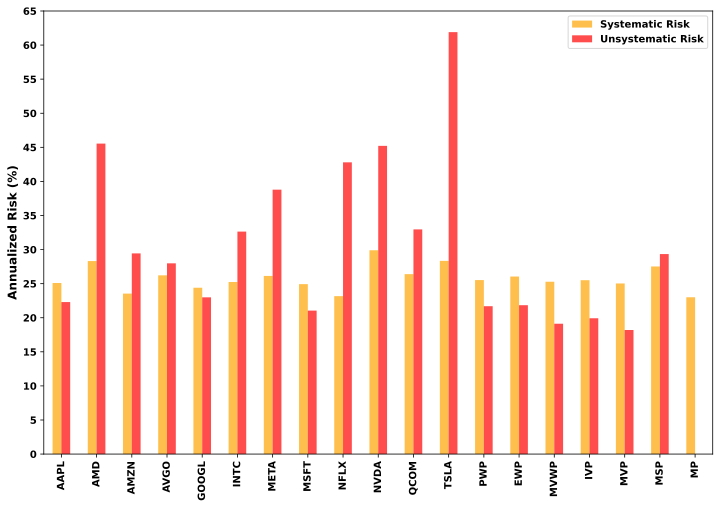

In [186]:
ann_summary[["Systematic Risk" , "Unsystematic Risk"]].mul(100).plot(kind = "bar", figsize = (12, 8), fontsize = 10, rot = 90, 
                                                                     yticks = range(0, 66, 5), color = ["orange", "red"], alpha = 0.7)  

plt.ylabel(ylabel = "Annualized Risk (%)", fontsize = 12) 
plt.style.use("default")   
plt.show( ) 

### 4.3 Rolling Beta 
<a id="subsection-43"></a>

In [187]:
def plot_rolling_beta(returns_df, window = 3) :
    """
    Arguments :
    - returns_df : DataFrame of daily returns 
    - window : int for the interval of the rolling window (months)
    
    Returns :
    - None 
    
    Function :
    - Plots the rolling beta for each asset (3-month by default)
    """
    sp500 = yf.download(tickers = "^GSPC", start = start_date, end = end_date)
    sp500_returns = sp500["Close"].pct_change(periods = 1).dropna( )
    sp500_monthly_returns = sp500_returns.resample("BM").agg(lambda daily_ret: (1 + daily_ret).prod( ) - 1)
    
    monthly_returns = returns_df.resample("BM").agg(lambda daily_ret: (1 + daily_ret).prod( ) - 1)
    
    rolling_cov = monthly_returns.rolling(window).cov(sp500_monthly_returns) 
    rolling_var = sp500_monthly_returns.rolling(window).var( )
    rolling_beta = rolling_cov.div(rolling_var, axis = 0) 
    
    assets = returns_df.columns 
    n_assets = len(returns_df.columns)
    fig, ax = plt.subplots(n_assets, 1, figsize = (12, n_assets * 4)) 
    colors = sns.color_palette("tab10") + ["limegreen", "fuchsia"]
    
    for i in range(n_assets) :
        ax[i].plot(rolling_beta[assets[i]], color = colors[i], label = assets[i])
        ax[i].set_ylabel(ylabel = "Rolling Beta", fontsize = 12)
        ax[i].legend( )
    
    plt.style.use("default") 
    plt.show( )

[*********************100%%**********************]  1 of 1 completed


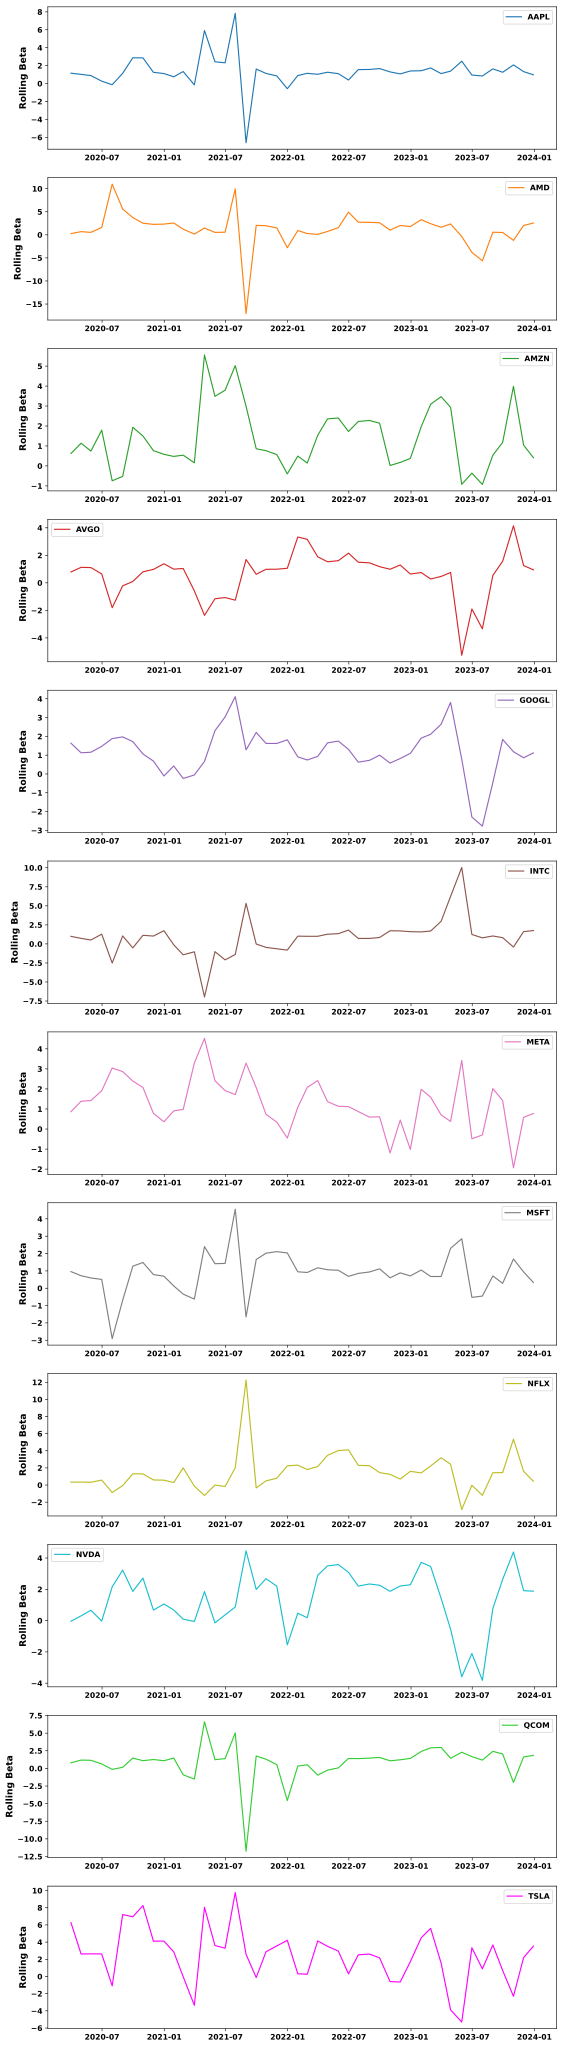

In [188]:
plot_rolling_beta(returns[tickers])

[*********************100%%**********************]  1 of 1 completed


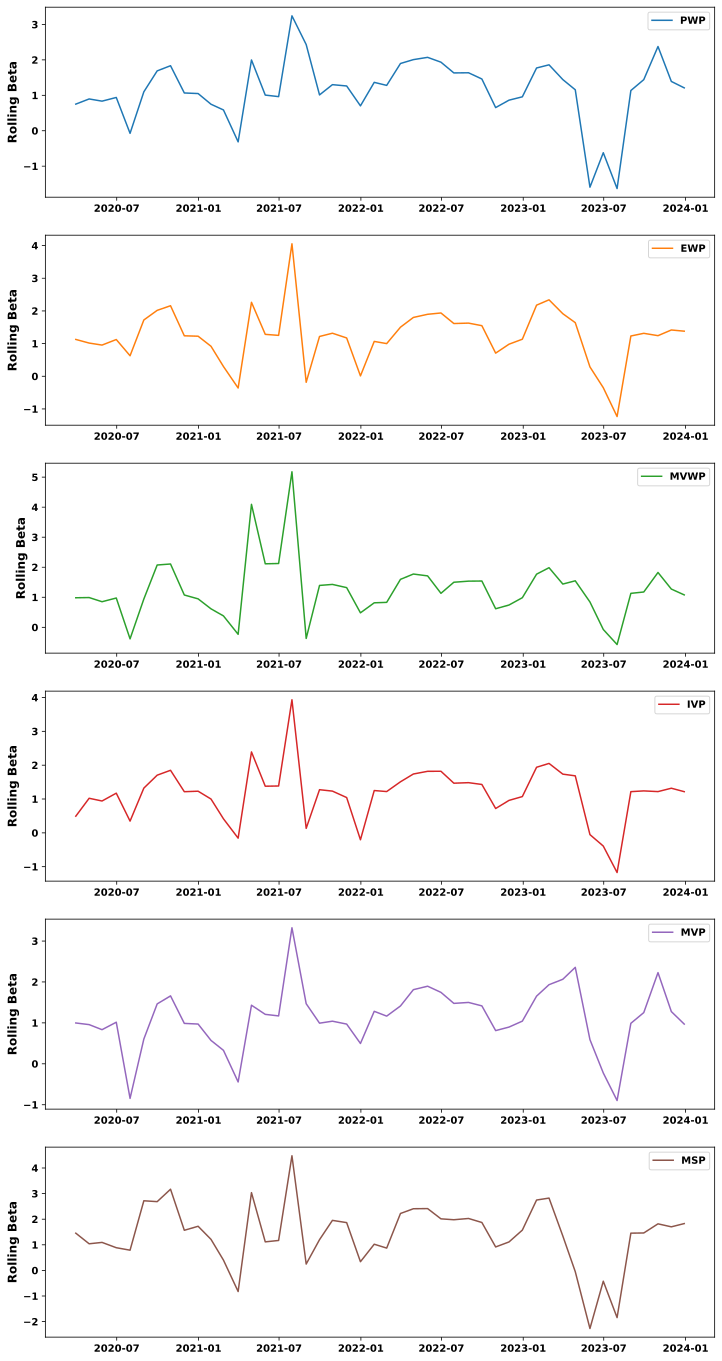

In [189]:
plot_rolling_beta(returns[portfs])

### 4.4 Expected Return and Alpha 
<a id="subsection-44"></a>

$$
\text{Expected Return} = \text{Risk-Free Rate} + \beta \times (\text{Return}_M - \text{Risk-Free Rate})
$$ 

$$
\text{Alpha} = \text{Realized Return} - \text{Expected Return}
$$ 

In [190]:
ann_summary["CAPM Return"] = rf_rate + (ann_summary.loc["MP" , "Annual Return"] - rf_rate) * ann_summary["Beta"] 
ann_summary["Alpha"] = ann_summary["Annual Return"].sub(ann_summary["CAPM Return"])

In [191]:
ann_summary[["Annual Return", "CAPM Return", "Alpha"]]#.style\
                                                      #.highlight_max(color = "lightgreen")\
                                                      #.highlight_min(color = "lightcoral")

Annual Return  CAPM Return   Alpha
AAPL          0.2979       0.1421  0.1558
AMD           0.4358       0.1727  0.2631
AMZN          0.1956       0.1286  0.0670
AVGO          0.3903       0.1524  0.2379
GOOGL         0.2405       0.1360  0.1045
INTC          0.0418       0.1434 -0.1016
META          0.2479       0.1515  0.0964
MSFT          0.2710       0.1406  0.1303
NFLX          0.2255       0.1256  0.1000
NVDA          0.6798       0.1891  0.4907
QCOM          0.2127       0.1540  0.0587
TSLA          0.7799       0.1730  0.6070
PWP           0.3000       0.1460  0.1540
EWP           0.3349       0.1507  0.1841
MVWP          0.2760       0.1438  0.1323
IVP           0.2975       0.1458  0.1517
MVP           0.2654       0.1415  0.1239
MSP           0.5134       0.1648  0.3487
MP            0.1242       0.1242  0.0000

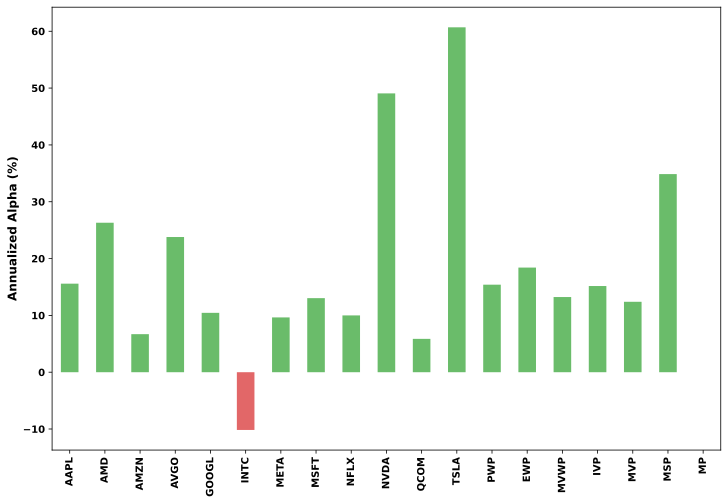

In [192]:
colors = ann_summary["Alpha"].apply(lambda x: "tab:green" if x >= 0 else "tab:red")
ann_summary["Alpha"].mul(100).plot(kind = "bar", figsize = (12 , 8), fontsize = 10, rot = 90, color = colors, alpha = 0.7)

plt.ylabel(ylabel = "Annualized Alpha (%)", fontsize = 12) 
plt.style.use("default")   
plt.show( ) 

### 4.5 Security Market Line 
<a id="subsection-45"></a>

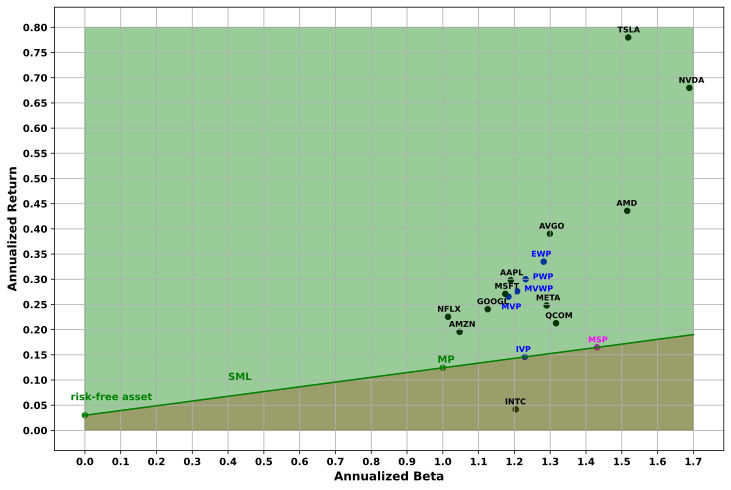

In [193]:
plt.figure(figsize = (12 , 8))

# plot the price–weighted portfolio
plt.scatter(x = ann_summary.loc["PWP", "Beta"], y = ann_summary.loc["PWP", "Annual Return"], s = 30, c = "blue")

plt.annotate("PWP", size = 8, c = "blue", 
             xy = (ann_summary.loc["PWP", "Beta"] + 0.02, ann_summary.loc["PWP", "Annual Return"]))

# plot the equally–weighted portfolio
plt.scatter(x = ann_summary.loc["EWP", "Beta"], y = ann_summary.loc["EWP", "Annual Return"], s = 30, c = "blue")

plt.annotate("EWP", size = 8, c = "blue", 
             xy = (ann_summary.loc["EWP", "Beta"] - 0.035, ann_summary.loc["EWP", "Annual Return"] + 0.01))

# plot the market-value–weighted portfolio
plt.scatter(x = ann_summary.loc["MVWP", "Beta"], y = ann_summary.loc["MVWP", "Annual Return"], s = 30, c = "blue")

plt.annotate("MVWP", size = 8, c = "blue", 
             xy = (ann_summary.loc["MVWP", "Beta"] + 0.02, ann_summary.loc["MVWP" , "Annual Return"]))

# plot the market portfolio
plt.scatter(x = ann_summary.loc["MP", "Beta"], y = ann_summary.loc["MP", "Annual Return"], s = 30, c = "green")

plt.annotate("MP", size = 10, c = "green", 
             xy = (ann_summary.loc["MP", "Beta"] - 0.015, ann_summary.loc["MP", "Annual Return"] + 0.01))

# plot the minimum variance portfolio
plt.scatter(x = ann_summary.loc["MVP", "Beta"], y = ann_summary.loc["MVP", "Annual Return"], s = 30, c = "blue")

plt.annotate("MVP", size = 8, c = "blue", 
             xy = (ann_summary.loc["MVP", "Beta"] - 0.02, ann_summary.loc["MVP", "Annual Return"] - 0.025))

# plot the maximum sharpe portfolio 
plt.scatter(x = ann_summary.loc["MSP", "Beta"], y = ann_summary.loc["MSP", "CAPM Return"], c = "fuchsia", s = 30)

plt.annotate("MSP", size = 8, c = "fuchsia", 
             xy = (ann_summary.loc["MSP", "Beta"] - 0.025, ann_summary.loc["MSP", "CAPM Return"] + 0.01))

# plot the inverse volatility portfolio 
plt.scatter(x = ann_summary.loc["IVP", "Beta"], y = ann_summary.loc["IVP", "CAPM Return"], c = "blue", s = 30)

plt.annotate("IVP", size = 8, c = "blue", 
             xy = (ann_summary.loc["IVP", "Beta"] - 0.025, ann_summary.loc["IVP", "CAPM Return"] + 0.01))

# plot the individual stocks in the portfolio 
plt.scatter(x = ann_summary.loc[tickers, "Beta"], y = ann_summary.loc[tickers, "Annual Return"], s = 30, c = "black")

for ticker in tickers : 
    plt.annotate(ticker, xy = (ann_summary.loc[ticker, "Beta"] - 0.03, ann_summary.loc[ticker, "Annual Return"] + 0.01), size = 8)  

#  plot the risk–free asset and the security market line 
plt.scatter(x = pd.Series(data = 0).values, y = rf_rate, s = 30, c = "green")
plt.annotate("risk-free asset", size = 10, c = "green", xy = (pd.Series(data = 0).values - 0.04, rf_rate + 0.03))

betas = np.array(range(0, 180, 10)) / 100 
capm_returns = rf_rate + (ann_summary.loc["MP", "Annual Return"] - rf_rate) * betas
plt.plot(betas, capm_returns, c = "green")

plt.fill_between(betas, capm_returns, color = "red", alpha = 0.3)
plt.fill_between(betas, 0.8, color = "green", alpha = 0.4)
plt.annotate("SML", size = 10, c = "green", xy = (0.4, 0.10))

plt.xticks(ticks = np.array(range(0, 18)) / 10)
plt.yticks(ticks = np.array(range(0, 81, 5)) / 100)
plt.xlabel(xlabel = "Annualized Beta",  fontsize = 12)
plt.ylabel(ylabel = "Annualized Return",  fontsize = 12) 
plt.grid( )
plt.style.use("default")  
plt.show( )

## 5. Farma-French 5-Factor Model 
<a id="section-5"></a>
<hr style="border: 0.25px solid black;">

### 5.1 Risk Factor Data (Daily) 
<a id="subsection-51"></a>

In [194]:
ff_five_factor = web.DataReader("F-F_Research_Data_5_Factors_2x3_Daily", "famafrench", start = start_date, end = end_date)[0]
ff_five_factor = ff_five_factor.iloc[1: , :-1].copy( )
ff_five_factor.columns = ["Excess Market Return", "Small minus Big", "High minus Low", "Robust minus Weak", "Conservative Minus Aggressive"]

In [195]:
ff_five_factor.describe( ).iloc[1:]

Excess Market Return  Small minus Big  High minus Low  \
mean                0.0478           0.0012          0.0053   
std                 1.4838           0.8327          1.2269   
min               -12.0000          -4.5500         -4.9700   
25%                -0.6500          -0.5100         -0.7000   
50%                 0.0700          -0.0100         -0.0400   
75%                 0.8000           0.4600          0.6975   
max                 9.3400           5.7200          6.7300   

      Robust minus Weak  Conservative Minus Aggressive  
mean             0.0288                         0.0096  
std              0.6852                         0.6008  
min             -2.1800                        -2.7400  
25%             -0.4100                        -0.3400  
50%              0.0100                        -0.0100  
75%              0.4800                         0.3800  
max              4.2100                         2.5200

### 5.2 Linear Regression 
<a id="subsection-52"></a>

$$
\hat{R}_t = \beta_{0} + \beta_{1} \times (\text{MKT}_t - \text{RF}_t) + \beta_{2} \times \text{SMB}_t + \beta_{3} \times \text{HML}_t + \beta_{4} \times \text{RMW}_t + \beta_{5} \times \text{CMA}_t + \epsilon_{t}
$$

In [196]:
def linear_regression(returns_df, factor_df) :
    """
    Arguments :
    - returns_df : DataFrame of returns 
    - factor_df : DataFrame of factor data 
    
    Returns :
    - pred_returns_df : DataFrame of returns predicted by the model 
    - reg_coefs_df : DataFrame of regression coefficients 
    
    Function :
    - Fits a linear regression model with factor data as predictor variables and returns as the target variable  
    - Retrieves the regression coefficients of each factor for each asset 
    """
    X = factor_df.copy( )
    Y = returns_df.copy( )
    
    lin_reg = linear_model.LinearRegression(fit_intercept = True)
    lin_reg.fit(X , Y)
    Y_pred = lin_reg.predict(X) 
    
    coefs = lin_reg.coef_
    coefs_columns = [f"Coef_{factor}" for factor in factor_df.columns] 
    
    pred_returns_df = pd.DataFrame(Y_pred, index = returns_df.index, columns = returns_df.columns)
    reg_coefs_df = pd.DataFrame(coefs, index = returns_df.columns, columns = coefs_columns)
    return pred_returns_df, reg_coefs_df

In [197]:
ff_returns = linear_regression(returns, ff_five_factor)[0]

In [198]:
def regression_summary(returns_df, factor_df) :
    """
    Arguments :
    - returns_df : DataFrame of returns 
    - ff_factor_df : DataFrame of factor data 
    
    Returns :
    - None  
    
    Function :
    - Prints the ANOVA table and summary statistics of the fitted regression model for each asset 
    """
    X = factor_df.to_numpy( )
    X = tools.add_constant(X)
    
    for asset in returns_df.columns :
        Y = returns_df[asset].to_numpy( )
        lin_reg = regression.linear_model.OLS(endog = Y, exog = X).fit( )
        summary = lin_reg.summary( )
        summary.tables[0].title = asset
        print(summary)
        print("")

In [199]:
regression_summary(returns[tickers], ff_five_factor)

                                     AAPL                                     
Dep. Variable:                      y   R-squared:                       0.779
Model:                            OLS   Adj. R-squared:                  0.778
Method:                 Least Squares   F-statistic:                     703.4
Date:                Sun, 08 Sep 2024   Prob (F-statistic):               0.00
Time:                        17:57:12   Log-Likelihood:                 3210.9
No. Observations:                1006   AIC:                            -6410.
Df Residuals:                    1000   BIC:                            -6380.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0004      0.000      1.245      0.2

In [200]:
regression_summary(returns[portfs + ["MP"]], ff_five_factor)

                                     PWP                                      
Dep. Variable:                      y   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.854
Method:                 Least Squares   F-statistic:                     1174.
Date:                Sun, 08 Sep 2024   Prob (F-statistic):               0.00
Time:                        17:57:12   Log-Likelihood:                 3423.8
No. Observations:                1006   AIC:                            -6836.
Df Residuals:                    1000   BIC:                            -6806.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0007      0.000      2.640      0.0

### 5.3 Regression Coefficients : Magnitude of Risk Factors Driving Returns
<a id="subsection-53"></a>

In [201]:
ff_coefs = linear_regression(returns, ff_five_factor)[1]

In [202]:
def plot_reg_coefs(reg_coefs_df) :
    """
    Arguments :
    - ff_coefs_df : DataFrame of regression coefficients of each factor for each asset 
    
    Returns :
    - None 
    
    Function :
    - Plots bar charts of the regression coefficients of each factor for each asset 
    """
    n_assets = len(reg_coefs_df.index)
    reg_coefs_df.mul(100).plot(kind = "bar", figsize = (n_assets , 25), fontsize = 10, width = 0.4, rot = 0, subplots = True, 
                               sharex = False, xlabel = "", ylabel = "% Change in Return", alpha = 0.7, legend = False) 

    plt.style.use("default")
    plt.show( )

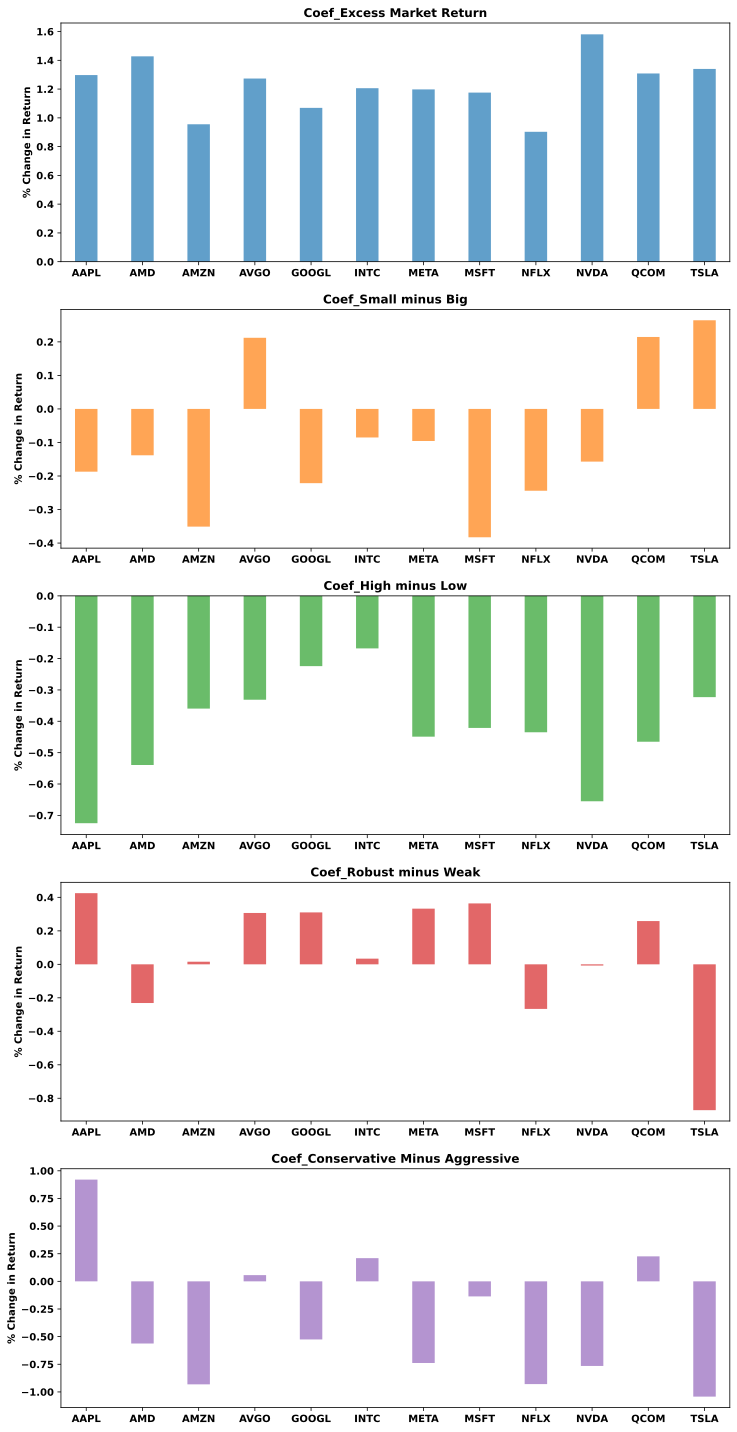

In [203]:
plot_reg_coefs(ff_coefs.loc[tickers])

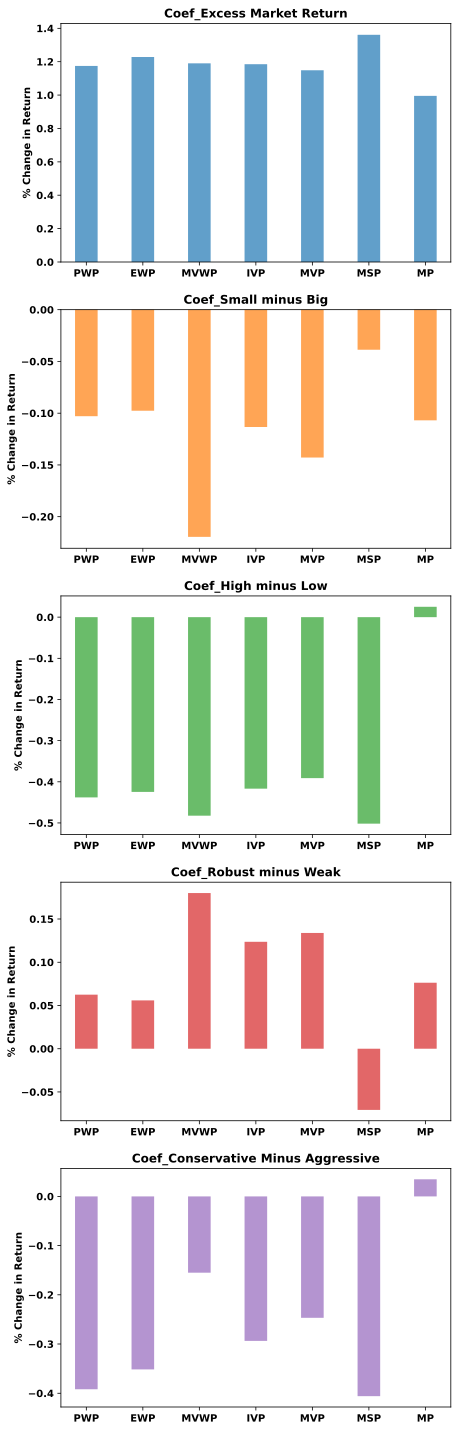

In [204]:
plot_reg_coefs(ff_coefs.loc[portfs + ["MP"]])

### 5.4 Model Evaluation 
<a id="subsection-54"></a>

$$
\text{Mean Squared Error} = \frac{1}{T} \sum_{t=1}^{T} (\text{Return}_t - \hat{\text{Return}}_t)^2
$$

$$
\text{Mean Absolute Error} = \frac{1}{T} \sum_{t=1}^{T} |\text{Return}_t - \hat{\text{Return}}_t|
$$

$$ 
\text{Mean Absolute Percentage Error} = \frac{1}{T} \sum_{t=1}^{T} \left| \frac{\text{Return}_t - \hat{\text{Return}}_t}{\text{Return}_t} \right| \times 100
$$

$$
\text{R}^2 = 1 - \frac{{\sum_{t=1}^{T} (\text{Return}_t - \hat{\text{Return}}_t)^2}}{{\sum_{t=1}^{T} (\text{Return}_t - \bar{\text{Return}})^2}}
$$

$$
\text{Adjusted R}^2 = 1 - \frac{{(1 - R^2) \times (T - 1)}}{{T - 5 - 1}}
$$

$$
\text{Akaike Information Criterion} = T \times \log\left(\frac{SSE}{T}\right) + 2 \times 5
$$

$$
\text{Bayesian Information Criterion} = T \times \log\left(\frac{SSE}{T}\right) + 5 \times \log(T)
$$

In [205]:
def eval_perf(Y, Y_pred) :
    """
    Arguments :
    - Y : DataFrame of actual daily returns 
    - Y_pred : DataFrame of daily returns predicted by the French-Farma model 
    
    Returns :
    - perf_df : DataFrame displaying ratios for evaluating a regression model 
    
    Function :
    - Computes the mean squared error, mean absolute error, mean absolute percentage error, r-squared, adjusted r-squared, akaike information criterion, and bayesian information criterion 
    """
    perf_metrics = {  }
    for asset in Y.columns :
        
        mse = metrics.mean_squared_error(Y[asset], Y_pred[asset])
        mae = metrics.mean_absolute_error(Y[asset], Y_pred[asset]) 
        mape = metrics.mean_absolute_percentage_error(Y[asset], Y_pred[asset]) 
        r2 = metrics.r2_score(Y[asset], Y_pred[asset])
        adjusted_r2 = 1 - ((1 - r2) * (len(Y) - 1) / (len(Y) - 5 - 1))
        
        residuals = Y[asset] - Y_pred[asset] 
        sse = np.sum(residuals ** 2)
        aic = len(Y[asset]) * np.log(sse / len(Y[asset])) + 2 * 5   
        bic = len(Y[asset]) * np.log(sse / len(Y[asset])) + 5 * np.log(len(Y[asset])) 
        
        perf_metrics[asset] = [mse, mae, mape, r2, adjusted_r2, aic, bic] 
    
    perf_metrics_df = pd.DataFrame(perf_metrics, index = ["Mean Squared Error", "Mean Absolute Error", "Mean Absolute Percentage Error", 
                                                          "R-Squared", "Adjusted R-Squared", 
                                                          "Akaike Information Criterion", "Bayesian Information Criterion"]).T    
    return perf_metrics_df 

In [206]:
ff_model_perf = eval_perf(returns, ff_returns)

In [207]:
ff_model_perf

Mean Squared Error  Mean Absolute Error  \
AAPL               0.0001               0.0072   
AMD                0.0005               0.0165   
AMZN               0.0002               0.0103   
AVGO               0.0002               0.0099   
GOOGL              0.0002               0.0083   
INTC               0.0004               0.0124   
META               0.0004               0.0130   
MSFT               0.0001               0.0064   
NFLX               0.0006               0.0147   
NVDA               0.0004               0.0143   
QCOM               0.0003               0.0121   
TSLA               0.0011               0.0236   
PWP                0.0001               0.0059   
EWP                0.0001               0.0056   
MVWP               0.0000               0.0047   
IVP                0.0001               0.0052   
MVP                0.0000               0.0048   
MSP                0.0001               0.0082   
MP                 0.0000               0.0006   

       Mean Absolute Percentage Error  R-Squared  Adjusted R-Squared  \
AAPL                 74319080506.0307     0.7786              0.7775   
AMD                  30847998157.7635     0.5350              0.5327   
AMZN                 33062793728.8824     0.5983              0.5963   
AVGO                           2.1399     0.6338              0.6320   
GOOGL                10053279621.8591     0.6625              0.6608   
INTC                220596565490.7340     0.4541              0.4514   
META                 29571425570.3356     0.4918              0.4892   
MSFT                 28325930998.4577     0.7944              0.7933   
NFLX                           2.1022     0.3787              0.3756   
NVDA                102378054067.4337     0.6544              0.6526   
QCOM                           1.6067     0.5505              0.5483   
TSLA                 48682832432.0928     0.3878              0.3848   
PWP                            1.3513     0.8544              0.8537   
EWP                            1.5156     0.8784              0.8778   
MVWP                           1.3274     0.9022              0.9017   
IVP                 683620345357.8303     0.8795              0.8789   
MVP                            1.3481     0.8839              0.8833   
MSP                            2.3370     0.8060              0.8051   
MP                             0.3493     0.9974              0.9974   

       Akaike Information Criterion  Bayesian Information Criterion  
AAPL                     -9266.6698                      -9242.1011  
AMD                      -7577.3220                      -7552.7534  
AMZN                     -8434.3678                      -8409.7991  
AVGO                     -8492.6672                      -8468.0985  
GOOGL                    -8844.6070                      -8820.0383  
INTC                     -7943.9948                      -7919.4261  
META                     -7763.5166                      -7738.9479  
MSFT                     -9398.4077                      -9373.8390  
NFLX                     -7481.3661                      -7456.7974  
NVDA                     -7854.3738                      -7829.8051  
QCOM                     -8092.8099                      -8068.2412  
TSLA                     -6820.8191                      -6796.2504  
PWP                      -9692.4979                      -9667.9292  
EWP                      -9844.4826                      -9819.9139  
MVWP                    -10204.2786                     -10179.7099  
IVP                      -9951.9893                      -9927.4206  
MVP                     -10079.6446                     -10055.0759  
MSP                      -9035.7425                      -9011.1738  
MP                      -14498.7697                     -14474.2010

In [208]:
def plot_fitted_vs_actual(Y, Y_pred) :
    """
    Arguments :
    - Y : DataFrame of actual daily returns 
    - Y_pred : DataFrame of daily returns predicted by French-Farma model 
    
    Returns :
    - None 
    
    Function :
    - Plots the ligne graphs of predicted cumulative returns and actual cumulative returns for each asset 
    """
    residuals = Y - Y_pred 
    
    n_assets = len(Y.columns)
    fig , ax = plt.subplots(figsize = (12 , n_assets * 5), sharex = False, sharey = False, nrows = n_assets, ncols = 1)
    
    colors = sns.color_palette("tab10") + ["limegreen", "fuchsia"]
    for i, asset in enumerate(Y.columns) :

            cum_returns_asset = (1 + Y[asset]).cumprod( ) - 1 
            cum_returns_ff = (1 + Y_pred[asset]).cumprod( ) - 1 
        
            ax[i].plot(cum_returns_asset * 100, color = colors[i], label = asset)
            ax[i].plot(cum_returns_ff * 100, color = "black", label = "Fitted")
        
            ax[i].set_ylabel(ylabel = "Cumulative Returns (%)", fontsize = 12)
            ax[i].legend( )
        
    plt.style.use("default")
    plt.show( )

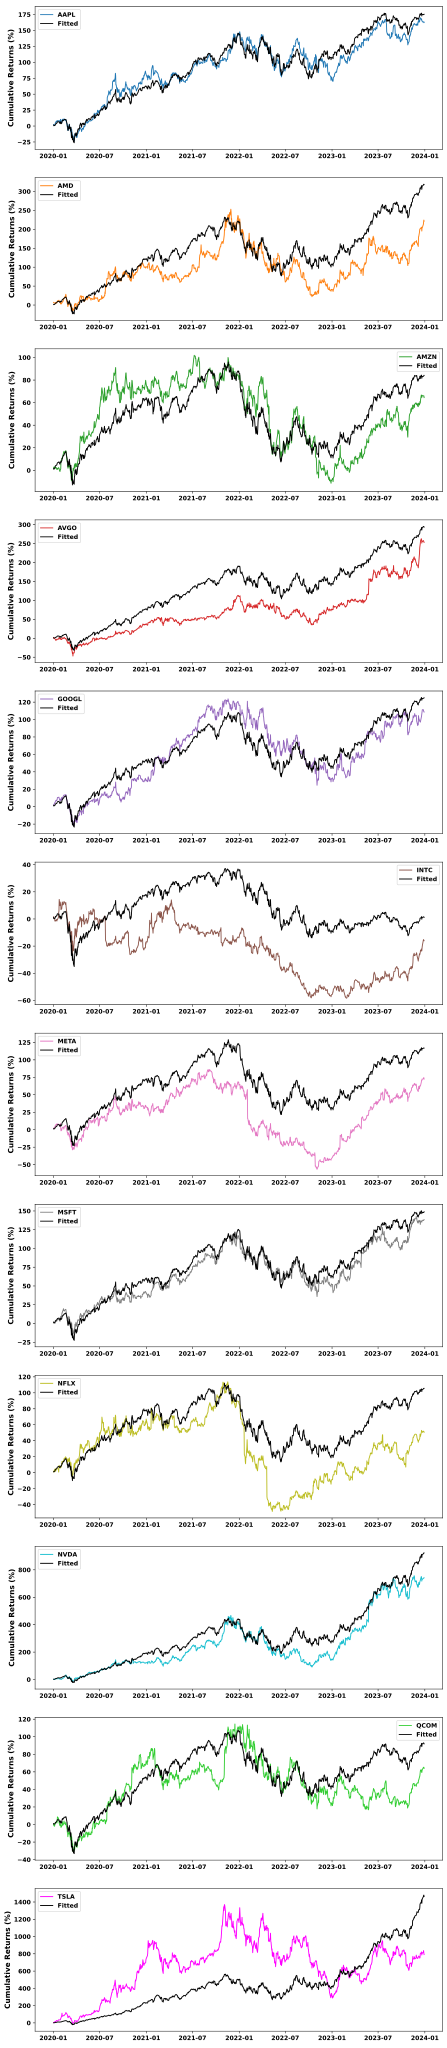

In [209]:
plot_fitted_vs_actual(returns[tickers], ff_returns[tickers])

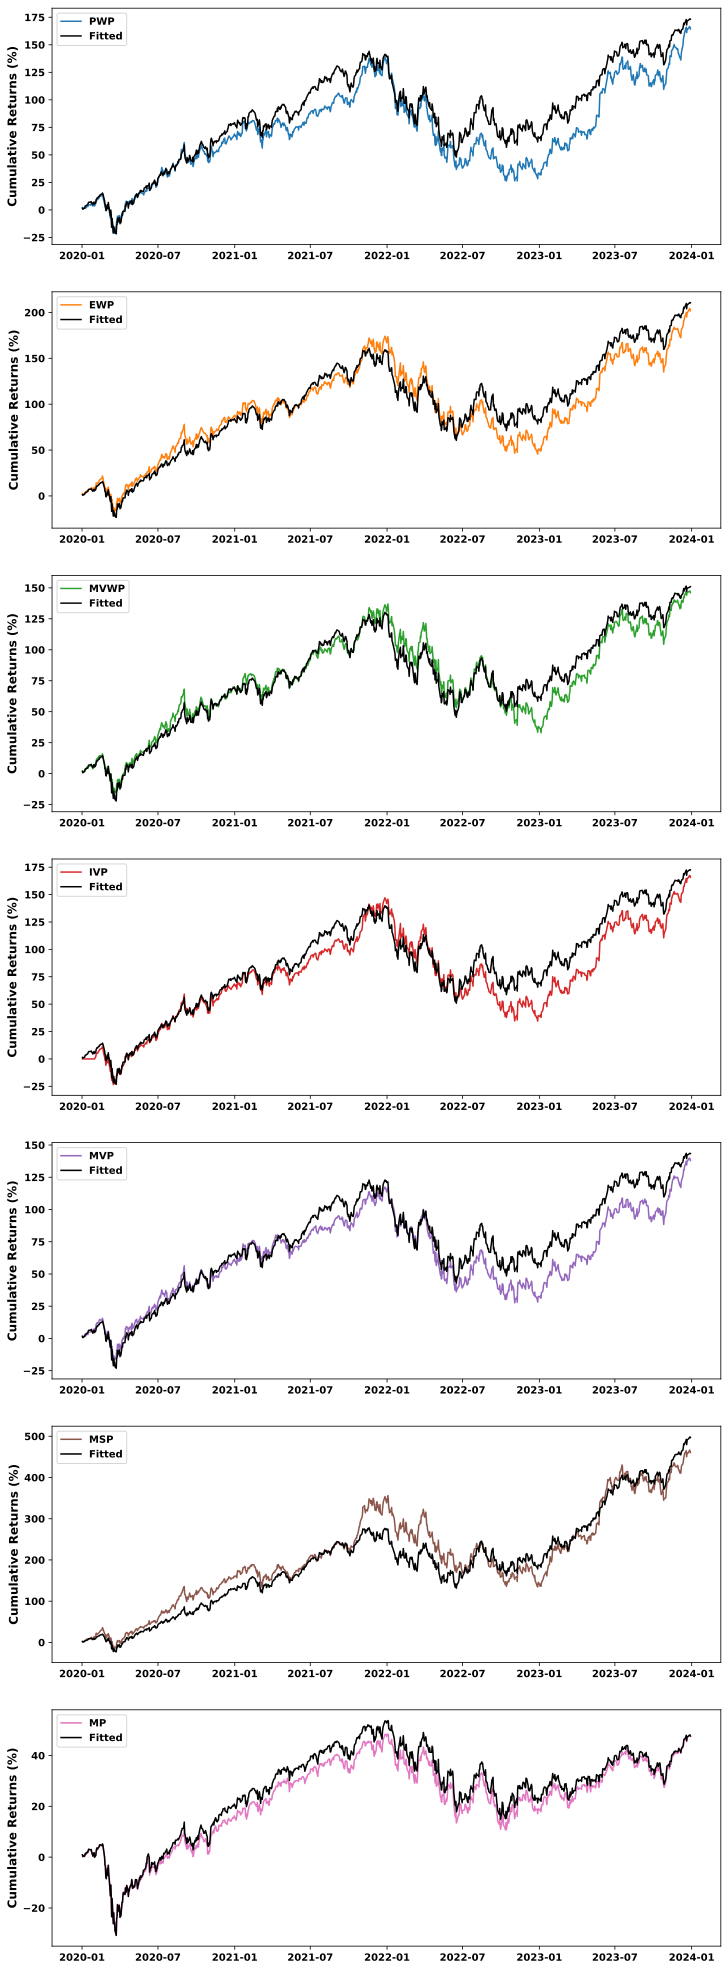

In [210]:
plot_fitted_vs_actual(returns[portfs + ["MP"]], ff_returns[portfs + ["MP"]])

### 5.5 Residual Analysis 
<a id="subsection-55"></a>

$$
e_t = y_t - \hat{y}_t 
$$ 

$\text{Where :}$
- $ y_t \text{ represents the actual return at time \( t \).} $
- $ \hat{y}_t \text{ represents the predicted return at time \( t \).} $ 

$$
DW = \frac{\sum_{t=2}^{T} (e_t - e_{t-1})^2}{\sum_{t=1}^{T} e_t^2} 
$$

$\text{Where :}$
- $ e_t \text{ represents the residual at time \( t \).} $
- $ T \text{ is the number of periods.} $ 

In [211]:
def residuals_summary(Y, Y_pred) :
    """
    Arguments :
    - Y : DataFrame of actual daily returns 
    - Y_pred : DataFrame of daily returns predicted by the regression model 
    
    Returns :
    - None     
    
    Function :
     - Computes the difference between actual daily returns and predicted daily returns 
    - Prints the average, standard deviation, minimum, 25th percentile, median, 75th percentile, and maximum of residuals 
    """
    residuals = Y - Y_pred 
    summary_df = residuals.mul(100).describe( ).T.drop(columns = "count")
    summary_df.columns = ["Average", "Standard Deviation", "Minimum", "25th Percentile", "Median", "75th Percentile", "Maximum"]
    summary_df.columns = [f"{col} (%)" for col in summary_df.columns]
    
    print("Summary Statistics of Regression Residuals (%)")
    return summary_df 

In [212]:
residuals_summary(returns, ff_returns)

Summary Statistics of Regression Residuals (%)


Average (%)  Standard Deviation (%)  Minimum (%)  25th Percentile (%)  \
AAPL       -0.0000                  0.9950      -4.0672              -0.5651   
AMD         0.0000                  2.3040      -9.4203              -1.2933   
AMZN        0.0000                  1.5048      -9.5831              -0.8346   
AVGO       -0.0000                  1.4618      -9.4840              -0.7658   
GOOGL       0.0000                  1.2272      -8.0238              -0.5983   
INTC       -0.0000                  1.9201     -15.3034              -0.8195   
META       -0.0000                  2.1003     -22.9211              -0.9215   
MSFT        0.0000                  0.9319      -5.9580              -0.4808   
NFLX       -0.0000                  2.4165     -33.0115              -1.0780   
NVDA       -0.0000                  2.0076      -7.7895              -1.2375   
QCOM       -0.0000                  1.7832     -10.3345              -0.9341   
TSLA       -0.0000                  3.3556     -19.0629              -1.7580   
PWP         0.0000                  0.8052      -4.9997              -0.4746   
EWP         0.0000                  0.7466      -3.6338              -0.4364   
MVWP        0.0000                  0.6244      -2.5889              -0.3698   
IVP        -0.0000                  0.7078      -3.3248              -0.3939   
MVP        -0.0000                  0.6643      -4.1716              -0.3883   
MSP        -0.0000                  1.1160      -4.7086              -0.6182   
MP          0.0000                  0.0739      -0.2738              -0.0461   

       Median (%)  75th Percentile (%)  Maximum (%)  
AAPL       0.0084               0.5204       7.8163  
AMD       -0.1692               1.1878      17.6648  
AMZN      -0.0883               0.7370      11.3210  
AVGO      -0.0744               0.6917      13.6347  
GOOGL     -0.0415               0.6098       7.5244  
INTC      -0.0112               0.8425      11.1107  
META      -0.0962               0.9517      19.4359  
MSFT      -0.0284               0.4355       7.2819  
NFLX      -0.0945               1.0136      16.5886  
NVDA      -0.0890               0.9857      21.3359  
QCOM      -0.0584               0.8141      14.9015  
TSLA      -0.2442               1.5646      17.1367  
PWP       -0.0064               0.4625       4.8342  
EWP        0.0036               0.4550       3.7106  
MVWP       0.0004               0.3716       2.4366  
IVP        0.0001               0.4215       3.7461  
MVP       -0.0157               0.3845       3.7460  
MSP       -0.0186               0.6161       7.2189  
MP         0.0005               0.0468       0.3513

In [213]:
def plot_residuals(Y, Y_pred) :
    """
    Arguments :
    - Y : DataFrame of actual daily returns 
    - Y_pred : DataFrame of daily returns predicted by the regression model 
    
    Returns :
    - None 
    
    Function :
    - Computes the difference between actual daily returns and predicted daily returns 
    - Plots line graphs of residuals over time for each asset 
    - Plots scatter points for the 10 largest positive residuals and 10 largest negative residuals 
    """
    residuals = Y - Y_pred 
    
    n_assets = len(Y.columns)
    fig , ax = plt.subplots(figsize = (12 , n_assets * 5), sharex = False, sharey = False, nrows = n_assets, ncols = 1)
    
    colors = sns.color_palette("tab10") + ["limegreen", "fuchsia"]
    for i, asset in enumerate(Y.columns) :
        
        ax[i].plot(residuals[asset] * 100, color = colors[i], label = asset)
        dw_statistic = stattools.durbin_watson(residuals[asset])
        legend_label = f"{asset}\nDurbin-Watson Statistic = {dw_statistic:.2f}"
        
        largest_positive_resids = residuals[asset].nlargest(10).sort_index( ) 
        largest_negative_resids = residuals[asset].nsmallest(10).sort_index( ) 
        ax[i].scatter(largest_positive_resids.index, largest_positive_resids.values * 100, color = colors[i], s = 30)
        ax[i].scatter(largest_negative_resids.index, largest_negative_resids.values * 100, color = colors[i], s = 30)
        
        ax[i].set_ylabel(ylabel = "Residual (%)", fontsize = 12)
        ax[i].legend([legend_label], fontsize = 10)
    
    plt.style.use("default")
    plt.show( )

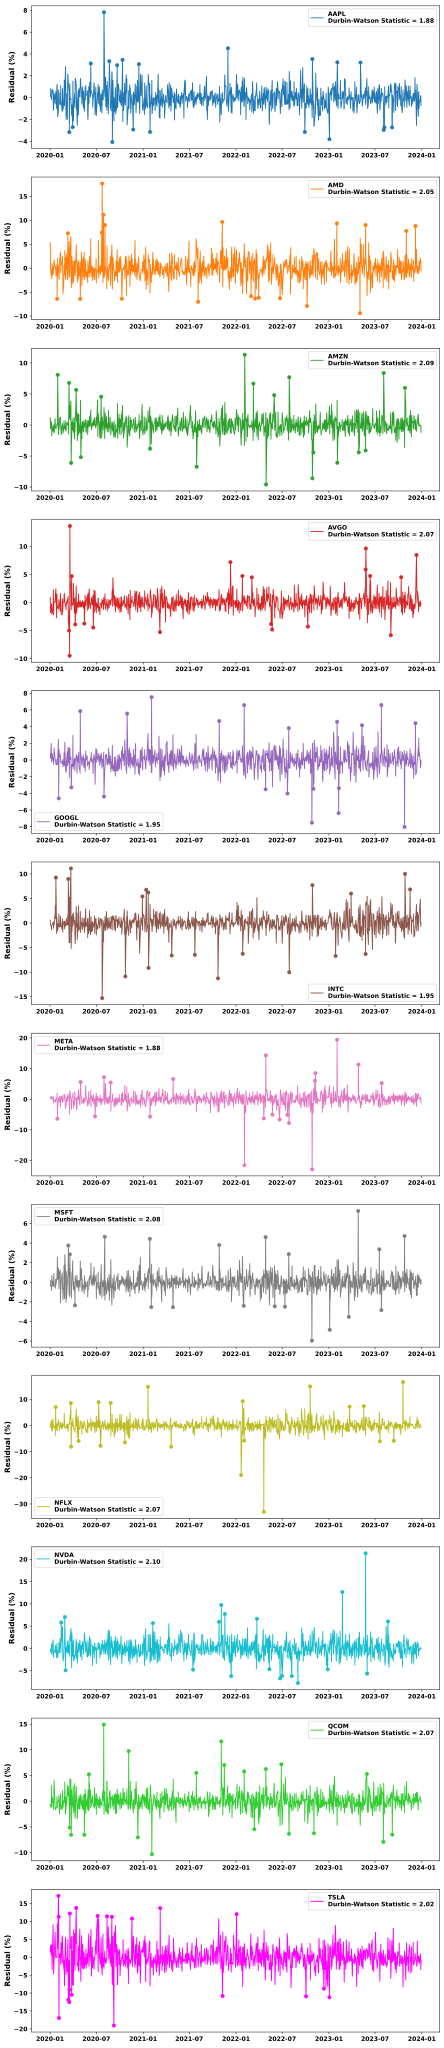

In [214]:
plot_residuals(returns[tickers], ff_returns[tickers])

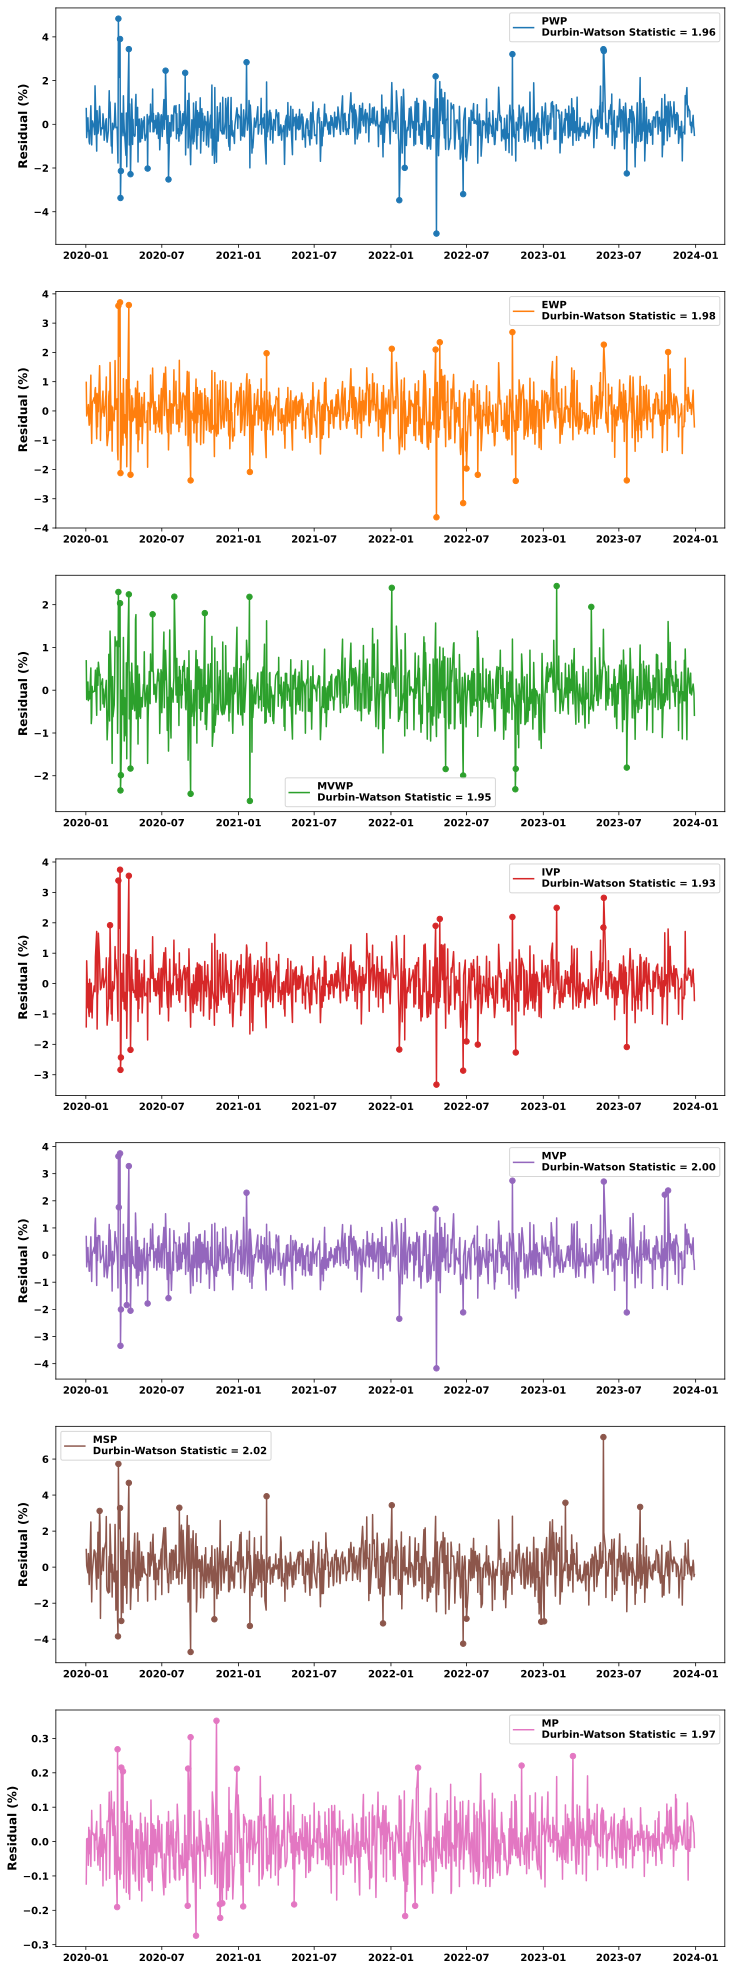

In [215]:
plot_residuals(returns[portfs + ["MP"]], ff_returns[portfs + ["MP"]])

In [216]:
def plot_residuals_vs_fitted(Y, Y_pred) :
    """
    Arguments :
    - Y : DataFrame of actual daily returns 
    - Y_pred : DataFrame of daily returns predicted by French-Farma model 
    
    Returns :
    - None 
    
    Function :
    - Draws a scatter plot with predited daily returns on the x-axis and residuals on the y-axis for each asset 
    - Draws 2 horizontal lines for the 95% confidence interval of residual values for each asset 
    """
    residuals = Y - Y_pred 
    
    n_assets = len(Y.columns)
    fig , ax = plt.subplots(figsize = (12 , n_assets * 5), sharex = False, sharey = False, nrows = n_assets, ncols = 1)
    
    colors = sns.color_palette("tab10") + ["limegreen", "fuchsia"]
    for i, asset in enumerate(Y.columns) :
        
        ax[i].scatter(Y_pred[asset] * 100, residuals[asset] * 100, color = colors[i], alpha = 0.7, s = 10, label = asset)
        
        ax[i].axhline(y = 0, color = "black", linestyle = "--")
        ax[i].axhline(y = (residuals[asset].mean( ) - 2 * residuals[asset].std( )) * 100, 
                      color = "red", linestyle = "--", label = "μ - 2σ (5%)")
        ax[i].axhline(y = (residuals[asset].mean( ) + 2 * residuals[asset].std( )) * 100, 
                      color = "green", linestyle = "--", label = "μ + 2σ (95%)")
        
        ax[i].set_xlabel(xlabel = "Fitted Return (%)", fontsize = 12)
        ax[i].set_ylabel(ylabel = "Residual (%)", fontsize = 12)
        ax[i].legend( )
        
    plt.style.use("default")
    plt.show( )

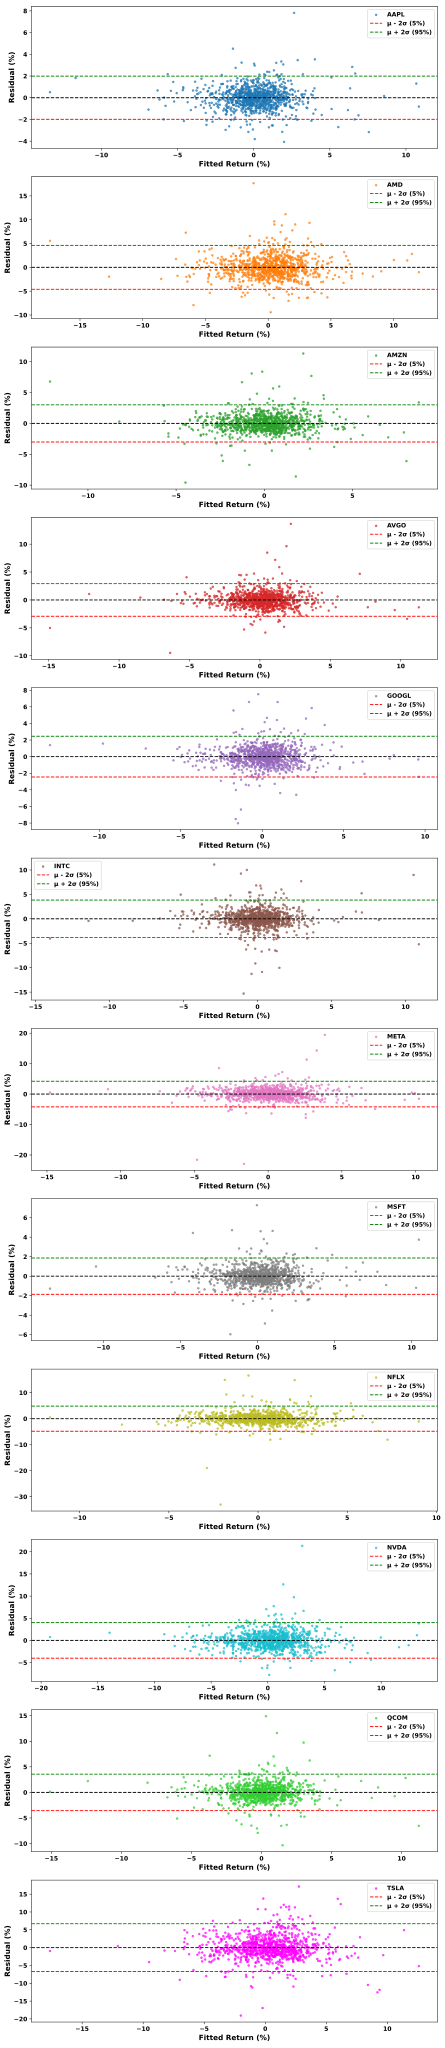

In [217]:
plot_residuals_vs_fitted(returns[tickers], ff_returns[tickers])

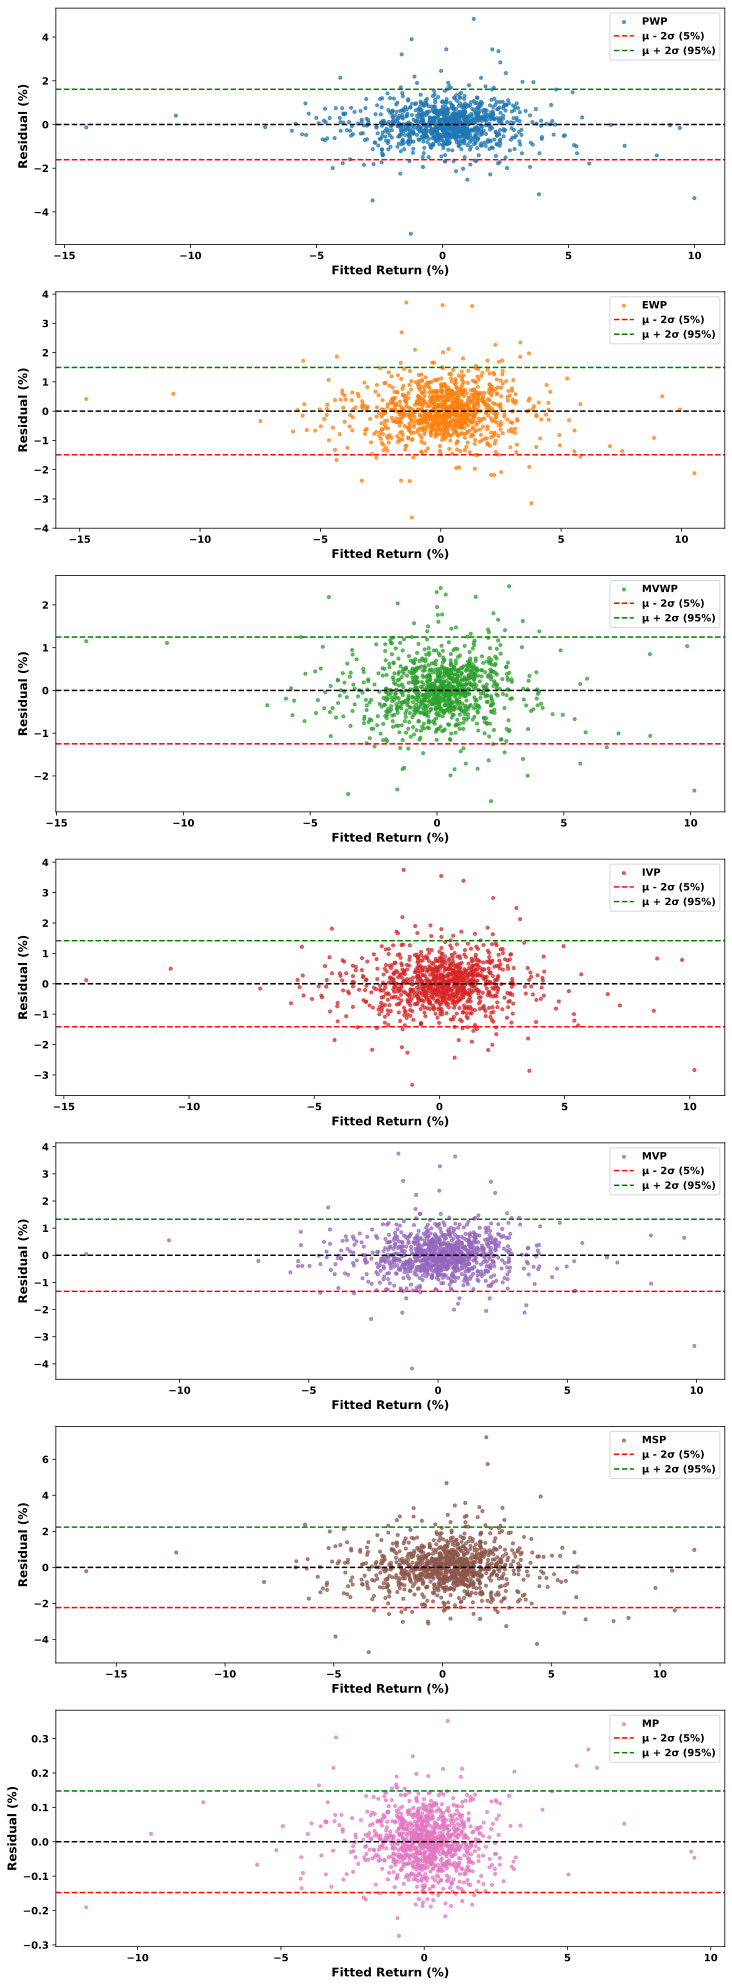

In [218]:
plot_residuals_vs_fitted(returns[portfs + ["MP"]], ff_returns[portfs + ["MP"]])

# Author 
[Khai Lap Vuong](https://www.linkedin.com/in/khai-lap-vuong/)